<a href="https://colab.research.google.com/github/sidharth-ds/Travel-insurance-prediction-project/blob/main/Travel_Insurance_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* Many types of insurance exist today and there are so many companies that offer insurance services. 
* These companies always need to predict whether or not a person will buy insurance so that they can save time and money for the most profitable customers.
* The dataset from Kaggle is about the previous customers of a travel insurance company.

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [11]:
data = pd.read_csv("/content/Travel Insurance Prediction.csv")
data.head()

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [12]:
data.drop(columns=["Unnamed: 0"], inplace=True)

In [13]:
data.isnull().sum()

Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  1987 non-null   int64 
 1   Employment Type      1987 non-null   object
 2   GraduateOrNot        1987 non-null   object
 3   AnnualIncome         1987 non-null   int64 
 4   FamilyMembers        1987 non-null   int64 
 5   ChronicDiseases      1987 non-null   int64 
 6   FrequentFlyer        1987 non-null   object
 7   EverTravelledAbroad  1987 non-null   object
 8   TravelInsurance      1987 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 139.8+ KB


In [15]:
data.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance
count,1987.00,1987.00,1987.00,1987.00,1987.00
mean,29.65,932762.96,4.75,0.28,0.36
std,2.91,376855.68,1.61,0.45,0.48
min,25.00,300000.00,2.00,0.00,0.00
25%,28.00,600000.00,4.00,0.00,0.00
50%,29.00,900000.00,5.00,0.00,0.00
75%,32.00,1250000.00,6.00,1.00,1.00
max,35.00,1800000.00,9.00,1.00,1.00


### EDA

* For a better understanding when analyzing this data, I will convert 1 and 0 to purchased and not purchased:

In [16]:
data["TravelInsurance"] = data["TravelInsurance"].map({0: "Not Purchased", 1: "Purchased"})
data.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,Not Purchased
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,Not Purchased
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,Purchased
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,Not Purchased
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,Not Purchased


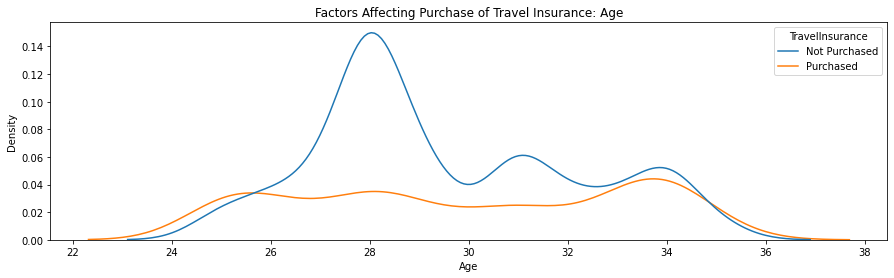

In [17]:
plt.figure(figsize=(15,4))
sns.kdeplot(data=data, x="Age", hue="TravelInsurance")

plt.title("Factors Affecting Purchase of Travel Insurance: Age")
plt.show()

INTERPRETATION
* people around 34 are more likely to buy an insurance policy and 
* people around 28 are very less likely to buy an insurance policy.

<Figure size 432x432 with 0 Axes>

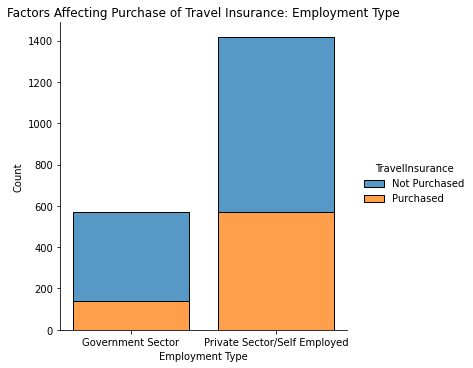

In [18]:
plt.figure(figsize=(6,6))
sns.displot(data=data, x="Employment Type", hue="TravelInsurance", multiple="stack", shrink=0.8)

plt.title("Factors Affecting Purchase of Travel Insurance: Employment Type")
plt.show()

INTERPRETATION:
*  people working in the private sector or the self-employed are more likely to have an insurance policy.

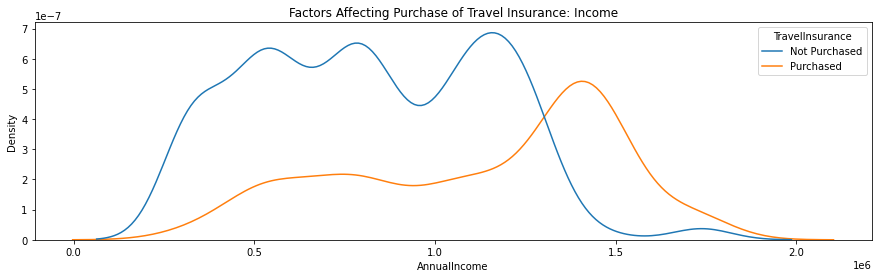

In [19]:
plt.figure(figsize=(15,4))
sns.kdeplot(data=data, x="AnnualIncome", hue="TravelInsurance")

plt.title("Factors Affecting Purchase of Travel Insurance: Income")
plt.show()

INTERPRETATION:
* people who are having an annual income of more than 14,00,000 are more likely to purchase the insurance policy.

### encoding

In [20]:
data["GraduateOrNot"] = data["GraduateOrNot"].map({"No": 0, "Yes": 1})
data["FrequentFlyer"] = data["FrequentFlyer"].map({"No": 0, "Yes": 1})
data["EverTravelledAbroad"] = data["EverTravelledAbroad"].map({"No": 0, "Yes": 1})
data["TravelInsurance"] = data["TravelInsurance"].map({"Purchased": 1, "Not Purchased": 0})

### preparing features and target

In [21]:
x = np.array(data[["Age", "GraduateOrNot", "AnnualIncome", "FamilyMembers", 
                   "ChronicDiseases", "FrequentFlyer", "EverTravelledAbroad"]])
y = np.array(data[["TravelInsurance"]])

### splitting

In [22]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.10, random_state=42)

### modelling

In [23]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(xtrain, ytrain)
predictions = model.predict(xtest)

### evaluation

In [24]:
# Looking at the accuracy score
from sklearn import metrics
acc = metrics.accuracy_score(ytest, predictions)
print(acc)


0.8190954773869347


In [25]:
#looking at the f1_score
from sklearn.metrics import f1_score
f1 = f1_score(ytest, predictions)
print(f1)

0.7096774193548386


Result:
* Auroc score of 0.81 shows that the model is not bad.

### Reducing overfitting:

In [26]:
##there are 1 param to play with - max depth - to choose the best parameter, I will try different combinations and hoose the one which has the best accuracy/auc/any eval metric on cross-validation or test data-set
from sklearn.model_selection import cross_val_score 
from sklearn.metrics import accuracy_score
import numpy as np

for depth in [1,2,3,4,5,6,7,8,9,10,20,40,60]:
  dt = DecisionTreeClassifier(max_depth=depth) # will tell the DT to not grow past the given threhsold

  dt.fit(xtrain, ytrain) 
  trainAccuracy = accuracy_score(ytrain, dt.predict(xtrain)) # to detect overfitting, we need both train data accuracy, test data accuracy
  
  dt = DecisionTreeClassifier(max_depth=depth)      # a fresh model which is not trained yet
  valAccuracy = cross_val_score(dt, x, y, cv=10)        # syntax : cross_val_Score(freshModel,fts, target, cv= 10/5)    # test dataset 
  print(depth, trainAccuracy, np.mean(valAccuracy))


1 0.7835570469798657 0.7871123293233847
2 0.7846756152125279 0.7886173290695905
3 0.8333333333333334 0.8359144205877875
4 0.8338926174496645 0.8339018323942948
5 0.8366890380313199 0.8308842190751738
6 0.8394854586129754 0.8273615552510023
7 0.8445190156599552 0.8243337901629358
8 0.8529082774049217 0.8198010253286634
9 0.8646532438478747 0.8147809755849957
10 0.8668903803131991 0.8067255469265519
20 0.9133109619686801 0.7875920004060707
40 0.9138702460850112 0.7875996142327801
60 0.9138702460850112 0.7860793868331556


at max_depth=3, we are getting the score of 0.83 which is better the previous one in predicting whether or not a person will buy the insurance.